In [20]:
import pandas as pd 
import numpy as np
from scipy.stats import pearsonr
import pandas as pd
import numpy as np
import scipy.stats
# For plotting style and resolution
import matplotlib.pyplot as plt
import json
import csv
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
from cycler import cycler

In [2]:
line_cycler   = (cycler(color=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]) +
                 cycler(linestyle=["-", "--", "-.", ":", "-", "--", "-."]))
marker_cycler = (cycler(color=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]) +
                 cycler(linestyle=["none", "none", "none", "none", "none", "none", "none"]) +
                 cycler(marker=["4", "2", "3", "1", "+", "x", "."]))
# matplotlib's standard cycler
standard_cycler = cycler("color", ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"])
plt.rc("axes", prop_cycle=line_cycler)
plt.rc("text", usetex=True)
plt.rc("text.latex", preamble=r"\usepackage{amssymb}\usepackage{mathtools}")
plt.rc("font", family="serif", size=18.)
plt.rc("savefig", dpi=500)
plt.rc("legend", loc="best", fontsize="medium", fancybox=True, framealpha=0.5)
plt.rc("lines", linewidth=2.5, markersize=4, markeredgewidth=2.5)

## Get CpG to chromosome mapping

In [3]:
mapping_info = pd.read_csv("C:/Users/amroa/aging/infinium-methylationepic-v10-b4/MethylationEPIC_v-1-0_B4.csv", skiprows=7)
#pd.read_csv("D:/archive/EPIC-8v2-0_A2.csv", skiprows=7)[['Name', 'CHR']]
#pd.read_csv("C:/Users/amroa/aging/infinium-methylationepic-v10-b4/MethylationEPIC_v-1-0_B4.csv", skiprows=7)
#pd.read_csv("C:/Users/amroa/aging/infinium-methylationepic-v10-b4/MethylationEPIC_v-1-0_B4.csv", skiprows=7)

C:\Users\amroa\AppData\Local\Temp\ipykernel_26028\3991700423.py:1: DtypeWarning: Columns (2,4,42) have mixed types. Specify dtype option on import or set low_memory=False.
  mapping_info = pd.read_csv("C:/Users/amroa/aging/infinium-methylationepic-v10-b4/MethylationEPIC_v-1-0_B4.csv", skiprows=7)


In [4]:
mapping_info

,IlmnID,Name,AddressA_ID,AlleleA_ProbeSeq,AddressB_ID,AlleleB_ProbeSeq,Infinium_Design_Type,Next_Base,Color_Channel,Forward_Sequence,...,TFBS_Evidence_Count,Methyl27_Loci,Methyl450_Loci,Chromosome_36,Coordinate_36,SNP_ID,SNP_DISTANCE,SNP_MinorAlleleFrequency,Random_Loci,Unnamed: 47
0,cg07881041,cg07881041,85713262,CTACAAATACAACACCCTCAACCCATATTTCATATATTATCTCATT...,NaN,NaN,II,NaN,NaN,CTGCACGCCTACTGCAGGTGCAGCACCCTCAGCCCATGTTTCATGT...,...,NaN,NaN,True,19,5187016,rs187313142,18,0.000200,NaN,NaN
1,cg18478105,cg18478105,46761277,AAATAAATTTCACTCTCAAATCCCAATCTCATACAACAAAACAAAA...,86644198.0,AAATAAATTTCGCTCTCAAATCCCAATCTCGTACGACGAAACGAAA...,I,C,Grn,TCCCGTCTTACGGGATGGATTTCGCTCTCAGGTCCCAGTCTCGTGC...,...,NaN,NaN,True,20,61318095,rs549944121,5,0.001797,NaN,NaN
2,cg23229610,cg23229610,21717843,ATAAAATTCTTTCCTTAAAAAACATTAAAACCAAAATAAACAAAAA...,NaN,NaN,II,NaN,NaN,GTTTCTGGACAGTAAAATTCTTTCCTTGAAGGACATTAGGGCCAAA...,...,NaN,NaN,True,1,6763712,rs545824288;rs527255711,40;12,0.000200;0.001198,NaN,NaN
3,cg03513874,cg03513874,29622133,ACAATAAAATAATAAAATCCCATCACTACTTACCCTCCTTAAATAA...,NaN,NaN,II,NaN,NaN,ATTGTGCCCACCTTGCTGCTGACAGTTAAGCATCACTAAAGTAGGA...,...,NaN,NaN,True,2,198011711,NaN,NaN,NaN,NaN,NaN
4,cg09835024,cg09835024,16745152,AATAAACACCAACCCCAAACCAATCTCACTTTATTAAATTACAAAA...,81631976.0,AATAAACGCCGACCCCGAACCGATCTCGCTTTATTAAATTACAAAA...,I,A,Red,AGCCCCGTCATAGGTGGGCGCCGACCCCGAGCCGATCTCGCTTTAT...,...,NaN,NaN,True,X,23982561,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866549,71678368,NORM_T,Purple,Norm_T3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
866550,72748406,NORM_A,Red,Norm_A23,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
866551,73635489,NORM_T,Purple,Norm_T35,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
866552,73784382,NORM_C,Green,Norm_C45,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
common_cpgs = np.load("common_cpg.npy", allow_pickle=True)
print(len(common_cpgs))

452832


In [6]:
s = mapping_info['IlmnID'].values
print(len(s))

866554


In [7]:
cmn = np.intersect1d(common_cpgs, s) # 379 
print(len(cmn))

452453


In [163]:
'cg00000029' in cmn

True

In [65]:
mapping = mapping_info[mapping_info['IlmnID'].isin(cmn)][['IlmnID', 'CHR', 'UCSC_RefGene_Name']]
mapping.to_csv("methylation_site_info.csv")
mapping

,IlmnID,CHR,UCSC_RefGene_Name
0,cg07881041,19,PTPRS;PTPRS;PTPRS;PTPRS
1,cg18478105,20,YTHDF1
2,cg23229610,1,NaN
3,cg03513874,2,NaN
4,cg09835024,X,EIF2S3
...,...,...,...
865912,cg10615271,12,ACVR1B
865913,cg23079522,3,PPM1L
865914,cg16818145,3,MCCC1
865916,cg10633746,17,SMCR7;SMCR7;SMCR7;SMCR7


In [8]:
test_loc = "D:/archive/ai4bio_testset_final/ai4bio_testset_final/testdata.csv"
map_test_loc = "D:/archive/ai4bio_testset_final/ai4bio_testset_final/testmap.csv"
train_loc = "D:/archive/ai4bio_trainset/traindata.csv"
map_train_loc = "D:/archive/ai4bio_trainset/trainmap.csv"

In [9]:
map_train = pd.read_csv(map_train_loc, index_col = 0)

In [10]:
map_train

,sample_id,age,gender,sample_type,disease
1,train10001,88.0,F,disease tissue,Alzheimer's disease
2,train10002,92.0,F,disease tissue,Alzheimer's disease
3,train10003,93.0,F,disease tissue,Alzheimer's disease
4,train10004,96.0,F,disease tissue,Alzheimer's disease
5,train10005,91.0,M,disease tissue,Alzheimer's disease
...,...,...,...,...,...
8229,train18229,74.0,M,disease tissue,type 2 diabetes
8230,train18230,74.0,M,disease tissue,type 2 diabetes
8231,train18231,81.0,M,disease tissue,type 2 diabetes
8232,train18232,67.0,M,disease tissue,type 2 diabetes


In [74]:
set(map_train['disease'].values)

{"Alzheimer's disease",
 "Graves' disease",
 "Huntington's disease",
 "Parkinson's disease",
 "Sjogren's syndrome",
 'control',
 'rheumatoid arthritis',
 'schizophrenia',
 'stroke',
 'type 2 diabetes'}

In [11]:
# We keep only the healthy patients
healthy_map_train = map_train[map_train['disease'] == 'control']
healthy_map_train

,sample_id,age,gender,sample_type,disease
738,train10738,100.0,F,control,control
739,train10739,94.0,F,control,control
740,train10740,81.0,F,control,control
741,train10741,85.0,F,control,control
742,train10742,80.0,F,control,control
...,...,...,...,...,...
6999,train16999,0.0,F,control,control
7000,train17000,74.4,M,control,control
7001,train17001,69.0,M,control,control
7002,train17002,34.0,F,control,control


In [128]:
sum(healthy_map_train['gender'].values == 'F'), sum(healthy_map_train['gender'].values == 'M')

(3314, 2884)

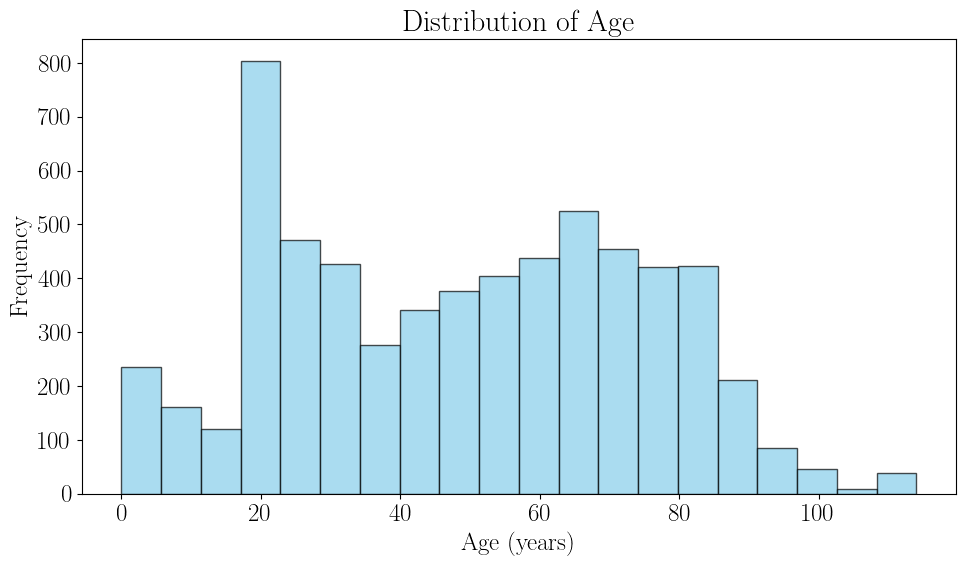

In [119]:
plt.figure(figsize=(10, 6))
plt.hist(healthy_map_train['age'], bins=20, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig("cfffprize_age.png")
plt.show()

In [12]:
healthy_idx = healthy_map_train['sample_id'].values

In [13]:
def calculate_na_percentage(chunk):
    total_cells = chunk.size  # Total number of cells in the chunk
    na_cells = chunk.isna().sum().sum()  # Total number of NA cells in the chunk
    na_percentage = (na_cells / total_cells) * 100  # Percentage of NA cells
    return na_percentage

In [14]:
age_values = healthy_map_train['age'].values

In [130]:
pd.read_csv(train_loc, nrows=20)

,cpgsite,train10001,train10002,train10003,train10004,train10005,train10006,train10007,train10008,train10009,...,train18224,train18225,train18226,train18227,train18228,train18229,train18230,train18231,train18232,train18233
0,cg00050873,NaN,NaN,NaN,NaN,1.136022,1.423834,NaN,1.475799,NaN,...,NaN,NaN,NaN,NaN,2.079779,1.991711,2.020410,1.814692,1.550147,2.142023
1,cg00212031,NaN,NaN,NaN,NaN,-4.489850,-9.210440,NaN,-3.993781,NaN,...,NaN,NaN,NaN,NaN,-6.811545,-3.886935,-3.938986,-3.343970,-2.963760,-2.881228
2,cg00213748,NaN,NaN,NaN,NaN,NaN,1.035353,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cg00214611,NaN,NaN,NaN,NaN,-3.993781,-3.837361,NaN,-4.051632,NaN,...,NaN,NaN,NaN,NaN,-3.701353,-3.256540,-3.543689,-3.580953,-3.744756,-3.701353
4,cg00455876,NaN,NaN,NaN,NaN,1.312567,1.288795,NaN,1.475799,NaN,...,NaN,NaN,NaN,NaN,1.004557,0.851873,1.259524,NaN,1.443126,NaN
5,cg01707559,NaN,NaN,NaN,-1.398461,-2.901295,-3.100385,NaN,-3.314031,NaN,...,NaN,NaN,NaN,NaN,-2.324893,-2.664729,-2.388119,-2.570129,-0.904911,-2.110522
6,cg02004872,NaN,NaN,NaN,NaN,-4.585271,-5.093549,NaN,-4.807960,NaN,...,NaN,NaN,NaN,NaN,-4.489850,-4.051632,-4.112908,-4.585271,-4.585271,-4.051632
7,cg02011394,NaN,NaN,NaN,NaN,2.804368,2.767818,NaN,2.785946,NaN,...,NaN,NaN,NaN,NaN,3.201956,2.842141,3.472874,3.343970,3.374769,3.406479
8,cg02050847,NaN,NaN,NaN,NaN,2.985388,1.848299,NaN,2.196336,NaN,...,NaN,NaN,NaN,NaN,5.093549,4.585271,3.701353,4.585271,3.837361,4.807960
9,cg02233190,NaN,NaN,NaN,NaN,-4.402578,-3.580953,NaN,-2.414368,NaN,...,NaN,NaN,NaN,NaN,-3.837361,-4.322159,-3.938986,-4.178048,-3.993781,-4.247583


In [15]:
col_indices = ['cpgsite'] + list(healthy_idx)

In [19]:
pd.read_csv(train_loc, usecols= col_indices, nrows=2)

,cpgsite,train10738,train10739,train10740,train10741,train10742,train10743,train10744,train10745,train10746,...,train16994,train16995,train16996,train16997,train16998,train16999,train17000,train17001,train17002,train17003
0,cg00050873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.621000,NaN,NaN,1.741912,2.001208,NaN,NaN
1,cg00212031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-3.886935,NaN,NaN,-3.100385,-3.659672,NaN,NaN


In [16]:
chunks_train = pd.read_csv(train_loc, usecols= col_indices, chunksize=5000)
results = []
for chunk in chunks_train:
    print("done")
    for row_label, row in chunk.iterrows():
        # We ignore rows with more than quarter of values being NaN or rows that are not in cmn cpgs
        if not (row[0] in common_cpgs):
            continue 

        methylation_healthy = row[1:]
        if methylation_healthy.isna().sum() / len(methylation_healthy) > 0.25:
            continue

        mask = ~methylation_healthy.isna()

        # Mask the row and age_values to ensure they are of the same length
        row_filtered = methylation_healthy[mask]
        age_values_filtered = age_values[mask]

        # Computation for the correlation is here
        corr, p_val = pearsonr(row_filtered, age_values_filtered)

        # Append the result as a dictionary to the results list
        results.append({
            'Row': row[0],
            'Correlation': corr,
            'P-Value': p_val
        })
        

done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


In [17]:
results

[{'Row': 'cg02494853',
  'Correlation': -0.031360102759728024,
  'P-Value': 0.013700578593840607},
 {'Row': 'cg03706273',
  'Correlation': -0.02404263881323457,
  'P-Value': 0.05886647855194952},
 {'Row': 'cg04023335',
  'Correlation': 0.03885557746499873,
  'P-Value': 0.0023974857968627338},
 {'Row': 'cg15295597',
  'Correlation': -0.10473392927936383,
  'P-Value': 1.5775933884116014e-16},
 {'Row': 'cg26520468',
  'Correlation': 0.07761610496108234,
  'P-Value': 1.0824941005533664e-09},
 {'Row': 'cg27539833',
  'Correlation': 0.045668475783616214,
  'P-Value': 0.00034949054848640814},
 {'Row': 'cg00008945',
  'Correlation': 0.006460573196909424,
  'P-Value': 0.6125842072377946},
 {'Row': 'cg00011200',
  'Correlation': 0.010396644007892713,
  'P-Value': 0.4142106758083279},
 {'Row': 'cg00011891',
  'Correlation': 0.008991164093487925,
  'P-Value': 0.4796503466685932},
 {'Row': 'cg00014152',
  'Correlation': -0.11089879221303528,
  'P-Value': 8.60553624975422e-16},
 {'Row': 'cg00016522'

In [18]:
len(results)

367195

In [21]:
with open('correlations.json', 'w') as file:
    json.dump(results, file)

In [23]:
with open('correlations.csv', 'w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=["Row", "Correlation", "P-Value"])
    writer.writeheader()
    writer.writerows(results)

In [25]:
cors = pd.read_csv("correlations.csv")
cors

,Row,Correlation,P-Value
0,cg02494853,-0.031360,1.370058e-02
1,cg03706273,-0.024043,5.886648e-02
2,cg04023335,0.038856,2.397486e-03
3,cg15295597,-0.104734,1.577593e-16
4,cg26520468,0.077616,1.082494e-09
...,...,...,...
367190,ch.22.44116734F,0.167601,5.430204e-31
367191,ch.22.46830341F,0.287779,1.333778e-119
367192,ch.22.1008279F,0.317898,2.632035e-146
367193,ch.22.47579720R,0.353811,1.028153e-181


In [27]:
filtered_cors = cors[(cors['P-Value'] < 0.001) & ((cors['Correlation'] > 0.3) | (cors['Correlation'] < -0.3))]
filtered_cors

,Row,Correlation,P-Value
69,cg00688681,0.311124,9.054499e-127
205,cg02295369,0.313148,1.616749e-140
401,cg04494122,-0.357795,8.936500e-167
856,cg09513996,0.373830,2.472535e-204
953,cg10856819,0.344613,7.363709e-172
...,...,...,...
367182,ch.22.33863861F,0.357235,2.036528e-187
367185,ch.22.38010425R,0.314048,5.166158e-142
367187,ch.22.740407F,0.300220,1.238965e-129
367192,ch.22.1008279F,0.317898,2.632035e-146


In [36]:
pruned_sites = np.array(filtered_cors['Row'].values, dtype=str)
pruned_sites, type(pruned_sites)

(array(['cg00688681', 'cg02295369', 'cg04494122', ..., 'ch.22.740407F',
        'ch.22.1008279F', 'ch.22.47579720R'], dtype='<U16'),
 numpy.ndarray)

In [39]:
chunks_train = pd.read_csv(train_loc, usecols= col_indices, chunksize=5000)
filtered_output_file = 'filtered_train_healthy.csv'
header_written = False
i = 0
for chunk in chunks_train:
    # Filter the chunk
    filtered_chunk = chunk[chunk['cpgsite'].isin(pruned_sites)]
    
    # Append the filtered chunk to the output file
    if not header_written:
        filtered_chunk.to_csv(filtered_output_file, mode='w', index=False)
        header_written = True
    else:
        filtered_chunk.to_csv(filtered_output_file, mode='a', header=False, index=False)

In [41]:
pd.read_csv(filtered_output_file, nrows=4) # sanity check

,cpgsite,train10738,train10739,train10740,train10741,train10742,train10743,train10744,train10745,train10746,...,train16994,train16995,train16996,train16997,train16998,train16999,train17000,train17001,train17002,train17003
0,cg00688681,0.588284,-0.035997,0.204671,0.144221,0.527819,0.459845,0.875837,0.502197,0.708031,...,-0.914682,-0.640954,-0.969175,-1.918093,NaN,-0.994389,-2.681278,-1.114405,-0.233002,-0.464061
1,cg02295369,0.318605,0.355631,0.277716,0.376304,0.228949,0.368026,0.443019,0.480968,1.806416,...,0.489446,0.422073,0.228949,-0.880658,0.566575,0.039997,-0.744433,-1.312567,0.372163,0.156286
2,cg04494122,-2.163468,-1.628272,-1.781880,-1.515914,-1.891498,-1.219330,-2.664729,-1.430239,-1.718460,...,0.689999,0.314505,0.176421,0.708031,NaN,0.455633,0.405382,0.104073,0.330922,0.944243
3,cg09513996,1.891498,1.710727,1.367282,1.972920,1.703036,1.773795,1.823018,1.757764,1.831393,...,0.544994,0.969175,0.694497,-0.359759,0.994389,0.614516,-0.969175,-1.411099,0.658700,0.847107
